# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Given a list of over 500 cities randomly drawn from the OpenWeatherMap API, a python script was used to determine whether there is a relationship between latitude and the following features: Temperature, Humidity, Cloudiness, and Wind speed. Further, a comparsion is made between the Northern and Southern Hemispheres using these same features. Regression Analyses and scatter plot visualizations yielded the following observations and conclusions:

- Temperature and Latitude showed an apparent correlation, resembling a parabolic shaped pattern. However, when split hemisperically, there is a negative relationship between temperature and latitude in the Northern Hemispere. In contrast, there is a positive relationship between temperature and latitude observed among cities within the Southern Hemispere.
- Temperature increases are noticed as we get closer to the Equator at 0 degrees Latitude.
- The regression, with nearly horizontal slopes, don't show much of a relationship between latitude versus humidity, cloudiness and wind speed.
- There are some cities in the Northe
- The sample data contains a higer representation of cities located within the Northern Hemispere.

Recommendation: Additional analyses, including larger population of cities located within the Southern Hemispere.

In [139]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import time
import datetime as dt
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [108]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

640

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [109]:
# Set the API base URL
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Create an empty list to contain the following Wx info for cities
city_id = []

latitude = []
longitude = []
countries = []
humidity = []
temp_hi = []
wind_velocity =[]
cirrus = []
date = []

# Initialize counter
record = 1

#Print log statement
print('Initiating Data Retrieval')
print('-------'*10)

# For Loop through list of cities
for city in cities:
   
    try:
        # Retrieve JSON city data
        response = requests.get(f'{base_url}&q={city}').json()
        city_id.append(response['name'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        countries.append(response['sys']['country'])
        humidity.append(response['main']['humidity'])
        temp_hi.append(response['main']['temp_max'])
        wind_velocity.append(response['wind']['speed'])
        cirrus.append(response['clouds']['all'])
        date.append(response['dt'])

        print(f'Retrieving data {record}|{city}')

        record += 1

        # Avoid time limit
        time.sleep(1.01)

             # If an error is is found, skip city
    except:
        print('City not found. Skipping...')
    continue


Initiating Data Retrieval
----------------------------------------------------------------------
Retrieving data 1|shuyskoye
Retrieving data 2|hithadhoo
Retrieving data 3|denpasar
Retrieving data 4|kaitangata
Retrieving data 5|deputatskiy
Retrieving data 6|ushuaia
Retrieving data 7|rupert
Retrieving data 8|isla mujeres
Retrieving data 9|rikitea
Retrieving data 10|lamu
Retrieving data 11|yerbogachen
Retrieving data 12|hobart
Retrieving data 13|birnin kebbi
Retrieving data 14|punta arenas
Retrieving data 15|batetskiy
Retrieving data 16|sembe
Retrieving data 17|laguna
City not found. Skipping...
Retrieving data 18|alta floresta
Retrieving data 19|kruisfontein
Retrieving data 20|watertown
City not found. Skipping...
Retrieving data 21|russkoye
Retrieving data 22|palmerston
Retrieving data 23|hirara
Retrieving data 24|kahului
Retrieving data 25|bonthe
Retrieving data 26|ostrovnoy
Retrieving data 27|dali
Retrieving data 28|soma
Retrieving data 29|griffith
Retrieving data 30|esperance
Retriev

Retrieving data 254|tual
Retrieving data 255|manadhoo
Retrieving data 256|petropavlovsk-kamchatskiy
Retrieving data 257|bam
Retrieving data 258|beloha
Retrieving data 259|longyan
Retrieving data 260|bojnurd
Retrieving data 261|bose
Retrieving data 262|khatanga
Retrieving data 263|mar del plata
Retrieving data 264|kutum
Retrieving data 265|lompoc
Retrieving data 266|geraldton
Retrieving data 267|sosnovo-ozerskoye
Retrieving data 268|berlevag
Retrieving data 269|wattegama
Retrieving data 270|burley
Retrieving data 271|khasan
Retrieving data 272|saint-augustin
Retrieving data 273|grand gaube
Retrieving data 274|aklavik
Retrieving data 275|novo aripuana
Retrieving data 276|grootfontein
Retrieving data 277|bo phloi
Retrieving data 278|usinsk
Retrieving data 279|kupino
Retrieving data 280|bambous virieux
Retrieving data 281|whitianga
City not found. Skipping...
Retrieving data 282|sakakah
Retrieving data 283|eyemouth
Retrieving data 284|san vicente
Retrieving data 285|pacocha
Retrieving data

Retrieving data 512|santa marta
Retrieving data 513|funchal
Retrieving data 514|puerto quijarro
Retrieving data 515|olafsvik
Retrieving data 516|tabuk
Retrieving data 517|cherskiy
City not found. Skipping...
Retrieving data 518|conceicao do araguaia
Retrieving data 519|vila velha
Retrieving data 520|nenita
Retrieving data 521|aasiaat
Retrieving data 522|svetlogorsk
Retrieving data 523|nizhniy kuranakh
Retrieving data 524|tieling
Retrieving data 525|bogovarovo
City not found. Skipping...
Retrieving data 526|tautira
Retrieving data 527|anyksciai
Retrieving data 528|corinto
Retrieving data 529|sergeyevka
Retrieving data 530|colorado
City not found. Skipping...
Retrieving data 531|illapel
Retrieving data 532|nortelandia
Retrieving data 533|poya
Retrieving data 534|moose factory
Retrieving data 535|mehamn
Retrieving data 536|baglung
Retrieving data 537|taltal
Retrieving data 538|donskoye
Retrieving data 539|shyryayeve
Retrieving data 540|nosy varika
Retrieving data 541|nichinan
Retrieving d

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [110]:
# Create a dictionary of key value pairs
wxinfo = {
    'City': city_id,
    'Lat': latitude,
    'Lon': longitude,
    'Country': countries,
    'Humidity': humidity,
    'Max Temperature': temp_hi,
    'Wind Speed': wind_velocity,
    'Cloudiness': cirrus,
    'Date': date
}

# Create a dataframe using dictionary of key value pairs
df_wx = pd.DataFrame(wxinfo)
df_wx.head()

,City,Lat,Lon,Country,Humidity,Max Temperature,Wind Speed,Cloudiness,Date
0,Shuyskoye,59.3736,41.0305,RU,95,33.49,8.88,96,1667836795
1,Hithadhoo,-0.6000,73.0833,MV,75,82.42,16.93,66,1667836797
2,Denpasar,-8.6500,115.2167,ID,88,80.26,4.61,20,1667836519
3,Kaitangata,-46.2817,169.8464,NZ,91,47.59,4.97,86,1667836799
4,Deputatsky,69.3000,139.9000,RU,88,-2.83,7.36,100,1667836536


In [111]:
# Save to a csv file
df_wx.to_csv("df_wx.csv")

In [112]:
df_wx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 580 entries, 0 to 579
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   City             580 non-null    object 
 1   Lat              580 non-null    float64
 2   Lon              580 non-null    float64
 3   Country          580 non-null    object 
 4   Humidity         580 non-null    int64  
 5   Max Temperature  580 non-null    float64
 6   Wind Speed       580 non-null    float64
 7   Cloudiness       580 non-null    int64  
 8   Date             580 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 40.9+ KB


In [132]:
hum_df = df_wx[df_wx["Humidity"] >= 100]
hum_df.head()

,City,Lat,Lon,Country,Humidity,Max Temperature,Wind Speed,Cloudiness,Date
74,Saskylakh,71.9167,114.0833,RU,100,-23.58,4.61,66,1667836905
137,Kiunga,-6.1219,141.2906,PG,100,73.36,1.32,100,1667836994
241,Hambantota,6.1241,81.1185,LK,100,75.54,2.30,100,1667837135
549,Osijek,45.5511,18.6939,HR,100,53.42,4.61,100,1667837559
551,Genhe,50.7833,121.5167,CN,100,11.44,1.79,100,1667837562


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [133]:
"""
There are no readings for Humidity recordings throughout the data frame that exceed 100% as shown in the table above.
"""

'\nThere are no readings for Humidity recordings throughout the data frame that exceed 100% as shown in the table above.\n'

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

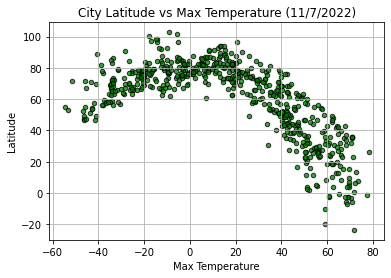

In [194]:
#Scatter plot of temp vs latitude
plt.scatter(df_wx['Lat'], df_wx['Max Temperature'], marker='o', s=20, c='g', edgecolors='black', alpha=.75)
now = dt.datetime.now()
#Customization
plt.title(f'City Latitude vs Max Temperature ({now.month}/{now.day}/{now.year})')
plt.xlabel('Max Temperature')
plt.ylabel('Latitude')
plt.grid(True)
#Show/Save
plt.savefig("../Images/CityLat_vs_MaxTemp.png")
plt.show()

## Latitude vs. Humidity Plot

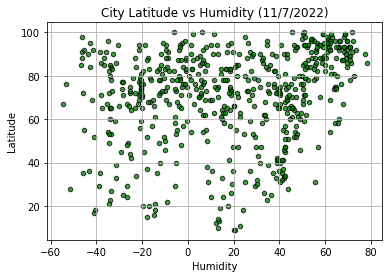

In [193]:
#Scatter plot of temp vs latitude
plt.scatter(df_wx['Lat'], df_wx['Humidity'], marker='o', s=20, c='g', edgecolors='black', alpha=.75)
now = dt.datetime.now()
#Customization
plt.title(f'City Latitude vs Humidity ({now.month}/{now.day}/{now.year})')
plt.xlabel('Humidity')
plt.ylabel('Latitude')
plt.grid(True)
#Show/Save
plt.savefig("../Images/CityLat_vs_Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

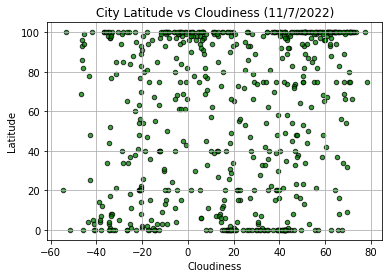

In [195]:
#Scatter plot of temp vs latitude
plt.scatter(df_wx['Lat'], df_wx['Cloudiness'], marker='o', s=20, c='g', edgecolors='black', alpha=.75)
now = dt.datetime.now()
#Customization
plt.title(f'City Latitude vs Cloudiness ({now.month}/{now.day}/{now.year})')
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.grid(True)
#Show/Save
plt.savefig("../Images/CityLat_vs_Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

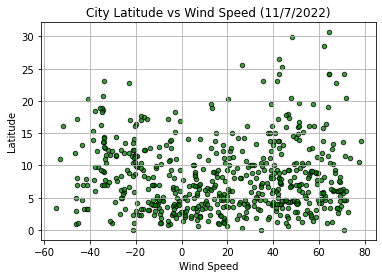

In [197]:
#Scatter plot of temp vs latitude
plt.scatter(df_wx['Lat'], df_wx['Wind Speed'], marker='o', s=20, c='g', edgecolors='black', alpha=.75)
now = dt.datetime.now()
#Customization
plt.title(f'City Latitude vs Wind Speed ({now.month}/{now.day}/{now.year})')
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')
plt.grid(True)
#Show/Save
plt.savefig("../Images/CityLat_vs_Wind.png")
plt.show()

## Linear Regression

In [150]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = df_wx.loc[(df_wx["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lon,Country,Humidity,Max Temperature,Wind Speed,Cloudiness,Date
0,Shuyskoye,59.3736,41.0305,RU,95,33.49,8.88,96,1667836795
4,Deputatsky,69.3000,139.9000,RU,88,-2.83,7.36,100,1667836536
6,Rupert,42.6191,-113.6772,US,76,44.55,24.16,100,1667836803
7,Isla Mujeres,21.2311,-86.7310,MX,72,84.25,12.24,4,1667836540
10,Yerbogachën,61.2767,108.0108,RU,95,23.50,11.97,100,1667836813


In [151]:
# Create a DataFrame with the Southern Hemisphere data (Latitude >= 0)
southern_hemi_df = df_wx.loc[(df_wx["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lon,Country,Humidity,Max Temperature,Wind Speed,Cloudiness,Date
1,Hithadhoo,-0.6000,73.0833,MV,75,82.42,16.93,66,1667836797
2,Denpasar,-8.6500,115.2167,ID,88,80.26,4.61,20,1667836519
3,Kaitangata,-46.2817,169.8464,NZ,91,47.59,4.97,86,1667836799
5,Ushuaia,-54.8000,-68.3000,AR,67,55.06,3.44,20,1667836578
8,Rikitea,-23.1203,-134.9692,PF,88,72.75,22.77,100,1667836809


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7414303198259976


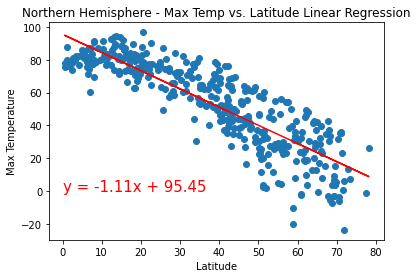

In [174]:
northern_hemi_df = df_wx.loc[(df_wx["Lat"] >= 0)]

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temperature"]

    
# Compute linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot function
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Display the linear regression equation
plt.annotate(line_eq,(0,0),fontsize=15,color="red")

# Show title and lables
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
print(f"The r-value is: {rvalue**2}")
plt.savefig("../Images/NorthHem_Temp_vs_Lat_Regr.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.33736627102230843


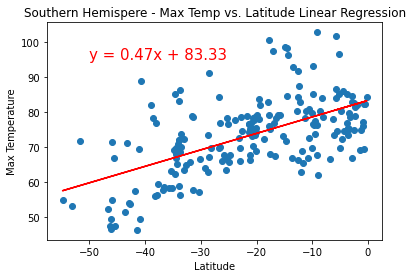

In [175]:
southern_hemi_df = df_wx.loc[(df_wx["Lat"] <= 0)]

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temperature"]

    
# Compute linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot function
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#Display the linear regression equation
plt.annotate(line_eq,(-50,95),fontsize=15,color="red")

# Show title and labels
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.title("Southern Hemispere - Max Temp vs. Latitude Linear Regression")
print(f"The r-value is: {rvalue**2}")
plt.savefig("../Images/SouthHem_Temp_vs_Lat_Regr.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.09672322737174031


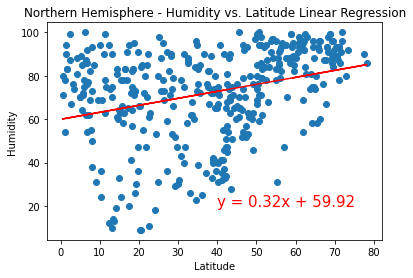

In [178]:
northern_hemi_df = df_wx.loc[(df_wx["Lat"] >= 0)]

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

    
# Compute linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot function
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Display the linear regression equation
plt.annotate(line_eq,(40,20),fontsize=15,color="red")

# Show title and lables
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
print(f"The r-value is: {rvalue**2}")
plt.savefig("../Images/NorthHem_Humid_vs_Lat_Regr.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.01698225877712403


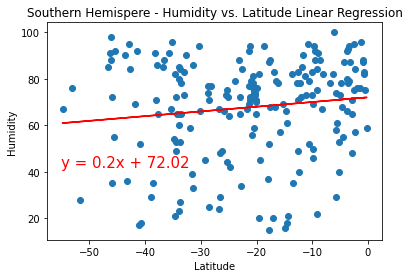

In [182]:
southern_hemi_df = df_wx.loc[(df_wx["Lat"] <= 0)]

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

    
# Compute linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot function
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#Display the linear regression equation
plt.annotate(line_eq,(-55,42),fontsize=15,color="red")

# Show title and labels
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemispere - Humidity vs. Latitude Linear Regression")
print(f"The r-value is: {rvalue**2}")
plt.savefig("../Images/SouthHem_Humid_vs_Lat_Regr.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.03707368762816291


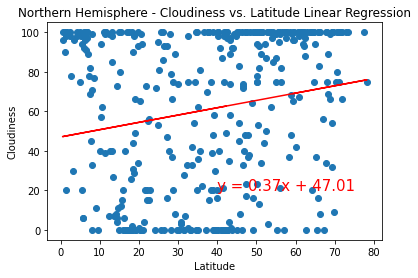

In [183]:
northern_hemi_df = df_wx.loc[(df_wx["Lat"] >= 0)]

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

    
# Compute linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot function
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Display the linear regression equation
plt.annotate(line_eq,(40,20),fontsize=15,color="red")

# Show title and lables
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
print(f"The r-value is: {rvalue**2}")
plt.savefig("../Images/NorthHem_Cloudy_vs_Lat_Regr.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.03823822034874352


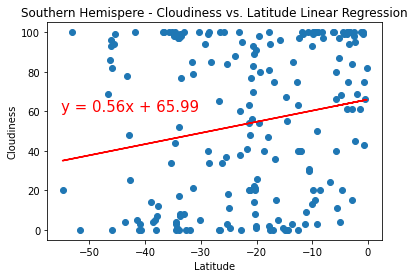

In [185]:
southern_hemi_df = df_wx.loc[(df_wx["Lat"] <= 0)]

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

    
# Compute linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot function
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#Display the linear regression equation
plt.annotate(line_eq,(-55,60),fontsize=15,color="red")

# Show title and labels
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemispere - Cloudiness vs. Latitude Linear Regression")
print(f"The r-value is: {rvalue**2}")
plt.savefig("../Images/SouthHem_Cloudy_vs_Lat_Regr.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.03588474536309906


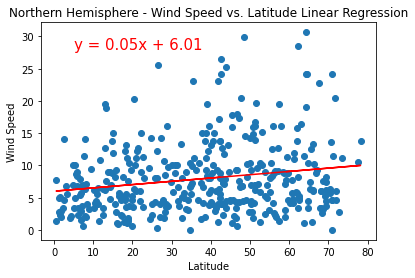

In [188]:
northern_hemi_df = df_wx.loc[(df_wx["Lat"] >= 0)]

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

    
# Compute linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot function
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Display the linear regression equation
plt.annotate(line_eq,(5,28),fontsize=15,color="red")

# Show title and lables
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
print(f"The r-value is: {rvalue**2}")
plt.savefig("../Images/NorthHem_Wind_vs_Lat_Regr.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.06208834816105734


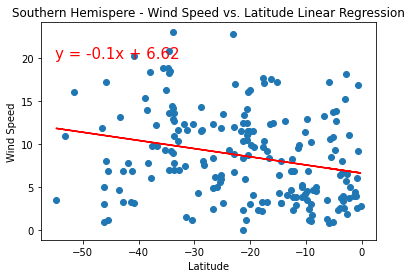

In [192]:
southern_hemi_df = df_wx.loc[(df_wx["Lat"] <= 0)]

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

    
# Compute linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot function
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#Display the linear regression equation
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")

# Show title and labels
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemispere - Wind Speed vs. Latitude Linear Regression")
print(f"The r-value is: {rvalue**2}")
plt.savefig("../Images/SouthHem_Wind_vs_Lat_Regr.png")
plt.show()